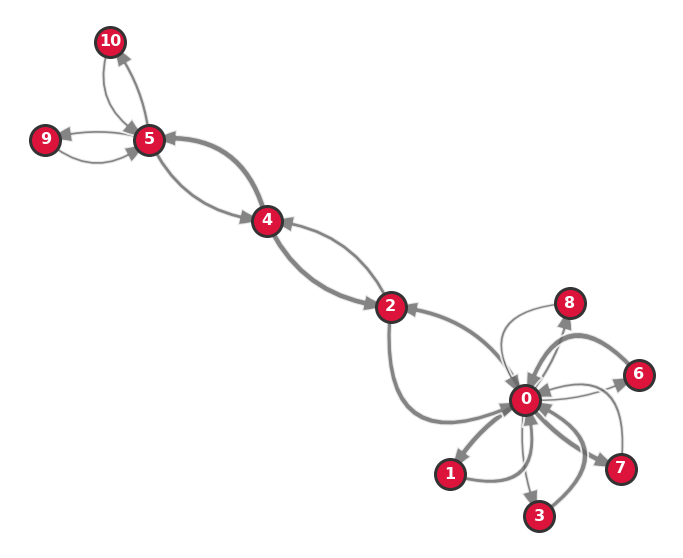

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

g = nx.barabasi_albert_graph(11,1)
g = nx.to_directed(g)
g = nx.convert_node_labels_to_integers(g)
# pos = nx.kamada_kawai_layout(g)
pos = nx.spring_layout(g)
weights = {i:np.random.uniform(1,5,1) for i in g.edges()}
nx.set_edge_attributes(g, weights,'weight')

fig, ax = plt.subplots(1,1,figsize=(12,10))
nx.draw_networkx_nodes(g,pos,node_size=900,ax=ax,edgecolors='#333333',linewidths=3.0,node_color='crimson')
nx.draw_networkx_labels(g,pos,font_color='w',font_size=16,font_weight='bold')

kinmax = max(list(dict(g.in_degree()).values()))

for e in g.edges(data=True):
    i = e[0]
    j = e[1]
    ew = e[2]['weight'][0]+2
    
    style="Simple,tail_width=%.2f,head_width=17,head_length=25"%(ew)
    kw = dict(arrowstyle=style, facecolor="#666666", alpha=0.8, edgecolor='w', linewidth=2)
    kin = g.in_degree(j)
    curv = kin*0.15
    a = patches.FancyArrowPatch(pos[i],pos[j],connectionstyle="arc3,rad=%.4f"%curv, **kw)
    plt.gca().add_patch(a)

ax.set_axis_off()
# plt.savefig('networktest.png',dpi=425,bbox_inches='tight')
plt.show()